## POSTTEST 6 - DEEP NEURAL NETWORK

In [256]:
import pandas as pd

In [257]:
df = pd.read_csv('Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


<i>melihat nilai null. 
tidak ada nilai null pada dataset ini.</i>

In [258]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

<i>melihat nilai duplikat. karena ada, maka dihapus. </i>

In [259]:
df.duplicated().sum()

1889

In [260]:
df.drop_duplicates(inplace=True)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 215.9+ KB


<i>mengubah kolom bertipe object menggunakan label encoder</i>

In [262]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns = ["Education","City","Gender","EverBenched"]
for cols in columns:
    df[cols] = encoder.fit_transform(df[cols])

<i>split dataset</i>

In [263]:
x = df.drop("LeaveOrNot", axis=1) # fitur
y = df["LeaveOrNot"] # target

In [264]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [265]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<i>membangun model sequential
1. input memiliki 8 fitur sehingga 'input_dim=8'
2. output menggunakan 'activation=sigmoid' karena klasifikasi biner dengan output antara 0 dan 1</i>

In [266]:
from keras import Sequential
from keras.layers import Dense

In [267]:
model = Sequential()

# input layer
model.add(Dense(128, activation='relu', input_dim=8))

# hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))

<i>fungsi callback : menghentikan training model saat mencapai akurasi tinggi. </i>

In [268]:
from keras.callbacks import EarlyStopping
monitor_callback = EarlyStopping(monitor='val_accuracy', patience=10)

<i>compile model</i>

In [269]:
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

In [270]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy']) 


<i>training model</i>

In [271]:
fit = model.fit(x = x_train, y = y_train,
          validation_data=(x_test,y_test),
          epochs=100, verbose=1,
          callbacks=[monitor_callback])

Epoch 1/100


61/61 [==============================] - 2s 7ms/step - loss: 0.6305 - accuracy: 0.6546 - val_loss: 0.5969 - val_accuracy: 0.7012
Epoch 2/100
61/61 [==============================] - 0s 4ms/step - loss: 0.5674 - accuracy: 0.7187 - val_loss: 0.5506 - val_accuracy: 0.7313
Epoch 3/100
61/61 [==============================] - 0s 4ms/step - loss: 0.5270 - accuracy: 0.7342 - val_loss: 0.5296 - val_accuracy: 0.7458
Epoch 4/100
61/61 [==============================] - 0s 4ms/step - loss: 0.4947 - accuracy: 0.7673 - val_loss: 0.5140 - val_accuracy: 0.7699
Epoch 5/100
61/61 [==============================] - 0s 4ms/step - loss: 0.4844 - accuracy: 0.7792 - val_loss: 0.5041 - val_accuracy: 0.7711
Epoch 6/100
61/61 [==============================] - 0s 4ms/step - loss: 0.4663 - accuracy: 0.7875 - val_loss: 0.4918 - val_accuracy: 0.7783
Epoch 7/100
61/61 [==============================] - 0s 4ms/step - loss: 0.4538 - accuracy: 0.8025 - val_loss: 0.4843 - val_accuracy: 0.7759
Epoch 8/100
61/61 [======

<i>evaluasi model
1. loss artinya rata-rata kesalahan prediksi model sekitar 0.5056
2. accuracy artinya model berhasil mengklasifikasikan sekitar 0.7831 akurasi data dengan benar</i>

In [272]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss : {loss}")
print(f"Accuracy : {accuracy}")

 1/26 [>.............................] - ETA: 0s - loss: 0.3606 - accuracy: 0.8125

26/26 [==============================] - 0s 2ms/step - loss: 0.5056 - accuracy: 0.7831
Loss : 0.5056381225585938
Accuracy : 0.7831325531005859


<i>grafik pergerakan metrik accuracy dan loss terhadap epoch pada training dan validation</i>

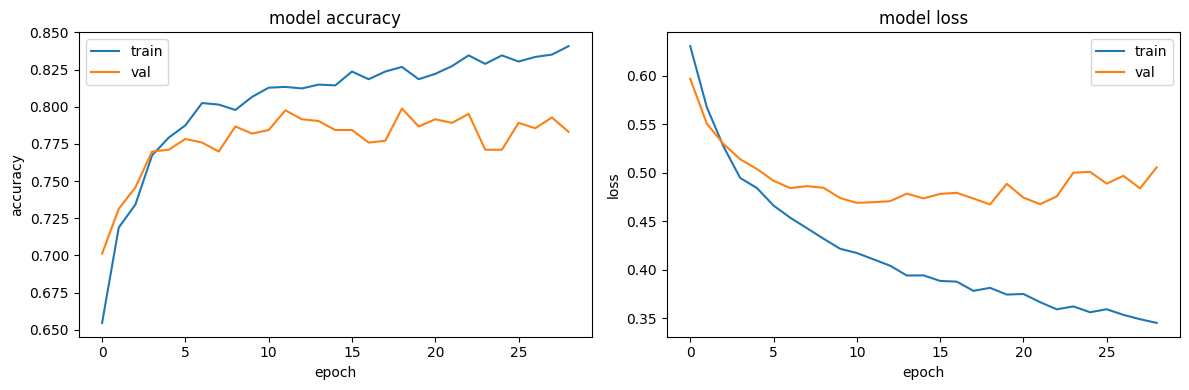

In [273]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fit.history['accuracy'], label='train')
plt.plot(fit.history['val_accuracy'], label='val')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fit.history['loss'], label='train')
plt.plot(fit.history['val_loss'], label='val')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
plt.show()